In [1]:
print("KUPPIREDDY BHAGEERATHA REDDY")
print("22BCE20355")
print("ML Lab")

KUPPIREDDY BHAGEERATHA REDDY
22BCE20355
ML Lab


[0.36198848 0.1920749 ]


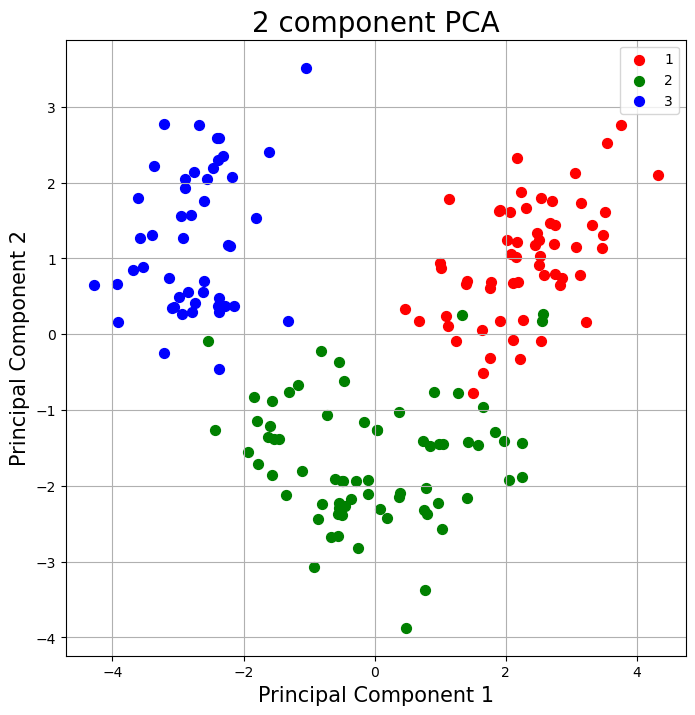

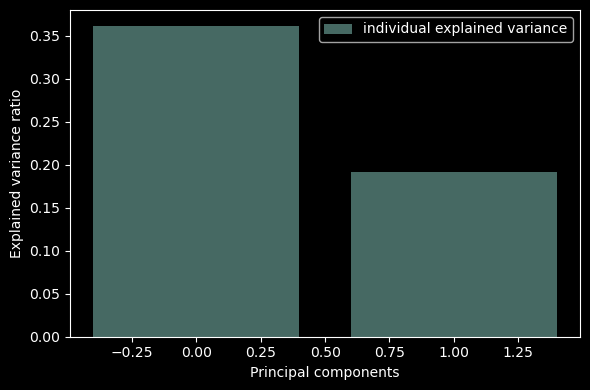

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset into Pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)
df.columns = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
              'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
              'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
            'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
            'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:, ['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

# Plotting the PCA result
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(2), explained_variance, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()